In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
def compute_integral_image(image):
    integral_image = np.zeros_like(image, dtype=np.int32)
    rows, cols = image.shape[:2]

    # Compute the cumulative sum along rows
    for y in range(rows):
        for x in range(cols):
            if x == 0:
                integral_image[y, x] = image[y, x]
            else:
                integral_image[y, x] = integral_image[y, x - 1] + image[y, x]

    # Compute the cumulative sum along columns
    for x in range(cols):
        for y in range(1, rows):
            integral_image[y, x] += integral_image[y - 1, x]

    return integral_image

In [8]:
frames_directory = './frames'
frames = [f for f in sorted(os.listdir(frames_directory)) if f.endswith(('.png', '.jpg', '.jpeg'))]

<Figure size 640x480 with 0 Axes>

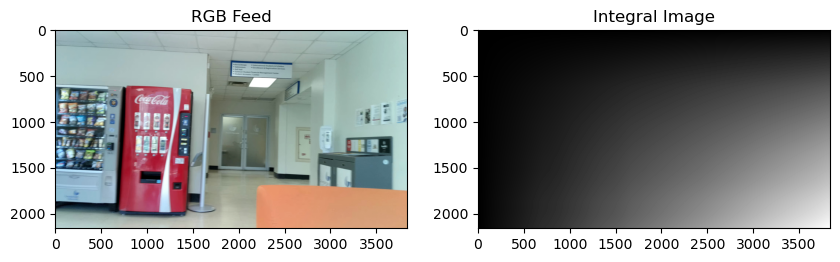

<Figure size 640x480 with 0 Axes>

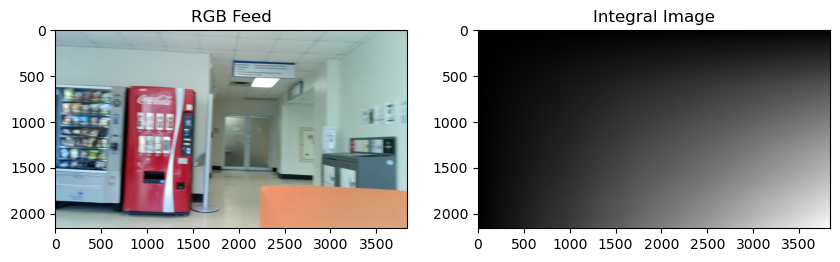

<Figure size 640x480 with 0 Axes>

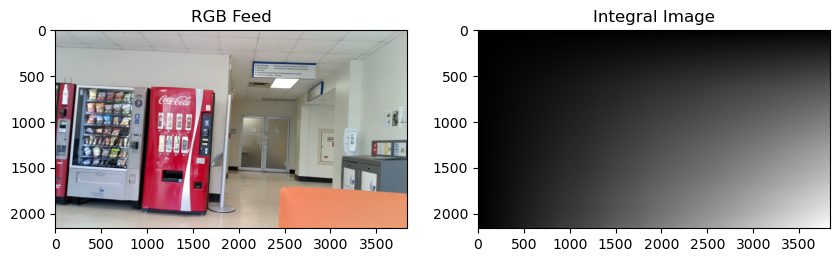

<Figure size 640x480 with 0 Axes>

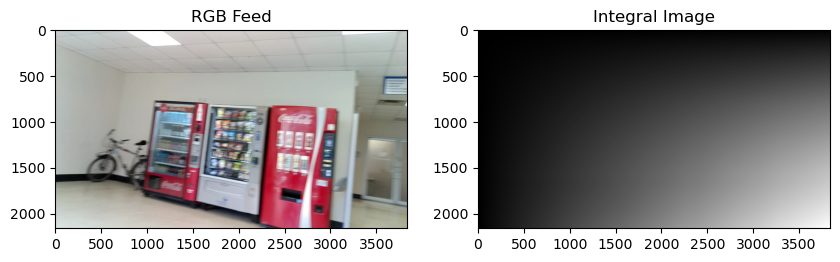

<Figure size 640x480 with 0 Axes>

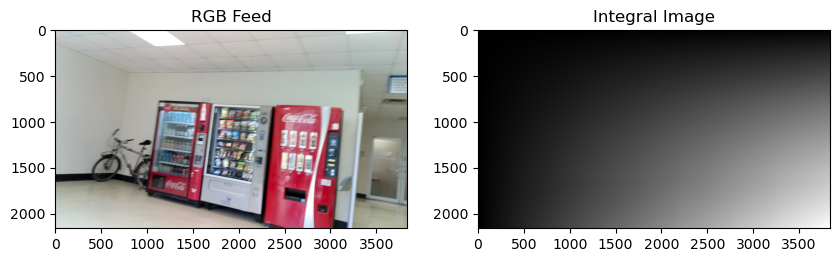

In [9]:
counter = 0

for frame_name in frames:
    # Read the frame
    frame_path = os.path.join(frames_directory, frame_name)
    frame = cv2.imread(frame_path)

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute integral image for the grayscale frame (assuming you have the compute_integral_image function)
    integral_image = compute_integral_image(gray_frame)

    # Clear the current figure
    plt.clf()

    # Display both the RGB frame and the integral image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('RGB Feed')
    plt.subplot(1, 2, 2)
    plt.imshow(integral_image, cmap='gray')
    plt.title('Integral Image')
    plt.show()

     # Increment counter
    counter += 1

    # Break the loop after displaying a certain number of plots (e.g., 5)
    if counter >= 5:
        break


    